# In situ data visualisation

In [107]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

The exercise uses the index file from the Baltic Sea region ([INSITU_BAL_NRT_OBSERVATIONS_013_032](http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&view=details&product_id=INSITU_BAL_NRT_OBSERVATIONS_013_032)).<br>
The index file lists all the available data files with:
* their catalog_id,
* file_name,
* spatial and temporal coverages,
* ...

The goal is to read such a file and plot the positions of the observations.

## Data reading

If you have an account in Copernicus Marine Environment Monitoring Service ([CMEMS](http://marine.copernicus.eu/)), you can download a new file.<br>
Otherwise use the file provided in the *data* directory.

In [104]:
indexfile = "./index_latest.txt"

### Read the fields from the file

Tip: use [genfromtxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) function.<br>
Import the necessary module to use that function.

In [105]:
import numpy as np

In [106]:
latmin, latmax, lonmin, lonmax = np.genfromtxt(indexfile, dtype=None, comments='#', usecols=(2, 3, 4, 5), delimiter=',', unpack=True)

The file provides a bounding box, so we compute the mean position.

In [98]:
lonmean = .5 * (lonmin + lonmax)
latmean = .5 * (latmin + latmax)

# Plots
## Simple plot

Use matplotlib to plot the positions of the observations.

In [99]:
import matplotlib.pyplot as plt

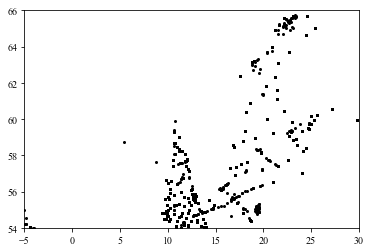

In [100]:
plt.plot(lonmean, latmean, 'ko', markersize=2)
plt.xlim(-5., 30.)
plt.ylim(54., 66.)
plt.show()
plt.close()

## Using Basemap module
Provides functions to make easier the representation of geo-located data.

In [101]:
from mpl_toolkits.basemap import Basemap

We first define a projection (Mercator)

In [102]:
m = Basemap(projection="merc",
                llcrnrlon=5, llcrnrlat=54,
                urcrnrlon=30, urcrnrlat=66,
                lat_ts=60, resolution='i')

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


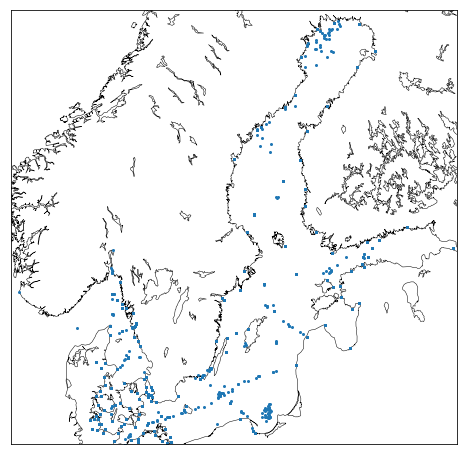

In [103]:
fig = plt.figure(figsize=(8, 8))
m.plot(lonmean, latmean, 'o', markersize=2, latlon=True)
m.drawcoastlines(linewidth=.5)
plt.show()
plt.close()

Add meridian, parallels.

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


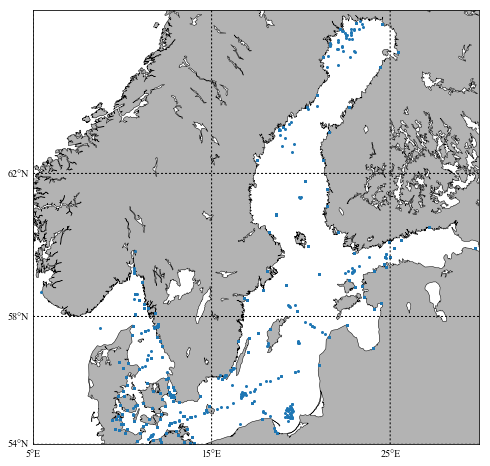

In [32]:
fig = plt.figure(figsize=(8, 8))
m.plot(lonmean, latmean, 'o', markersize=2, latlon=True)
m.drawparallels(np.arange(54, 66, 4), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(5, 30, 10), labels=[0, 0, 0, 1])
m.drawcoastlines(linewidth=.5)
m.fillcontinents(color=".7")
plt.show()
plt.close()

Larger font, map scale.

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


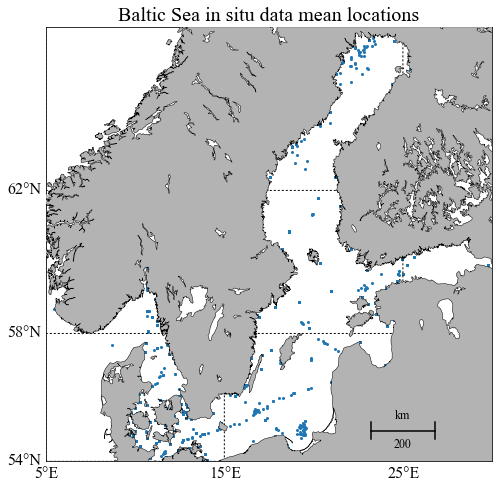

In [42]:
fig = plt.figure(figsize=(8, 8))
m.plot(lonmean, latmean, 'o', markersize=2, latlon=True)
m.drawparallels(np.arange(54, 66, 4), labels=[1, 0, 0, 0], fontsize=16)
m.drawmeridians(np.arange(5, 30, 10), labels=[0, 0, 0, 1], fontsize=16)
m.drawcoastlines(linewidth=.5, zorder=4)
m.fillcontinents(color=".7", zorder=3)
m.drawmapscale(25, 55, 25, 55, 200, barstyle='simple', units='km', fontsize=12, zorder=5)
plt.title("Baltic Sea in situ data mean locations", fontsize=20)
plt.show()
plt.close()

## Create a dynamic map
Use the [folium](https://folium.readthedocs.io/en/latest/) module that creates [leaflet](http://leafletjs.com/) maps.

In [43]:
import folium

### First map: select a tiles type

In [80]:
tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/Ocean_Basemap/MapServer/tile/{z}/{y}/{x}'
attribution = 'Tiles &copy; Esri &mdash; Sources: GEBCO, NOAA, CHS, OSU, UNH, CSUMB, National Geographic, DeLorme, NAVTEQ, and Esri'
map1 = folium.Map(location=[60., 22.5], zoom_start=5, tiles=tiles, attr=attribution)
map1

### Let's create a heap map
We can use all the leaflet plugins!

In [81]:
from folium.plugins import HeatMap

In [83]:
coords = [[lat, lon, 1] for lat, lon in zip(latmean, lonmean)]
HeatMap(coords).add_to(map1)
map1

### Markercluster

In [84]:
from folium.plugins import MarkerCluster

In [88]:
map2 = folium.Map(location=[60., 22.5], zoom_start=5, tiles=tiles, attr=attribution)
marker_cluster = MarkerCluster().add_to(map2)
for lat, lon in zip(latmean[::10], lonmean[::10]):
    folium.Marker(location=[lat, lon], icon=None).add_to(marker_cluster)
map2